In [1]:
# ESERCIZIO 1
# Da plotly.express importiamo i dataset stocks, mediante: 
# from plotly import express as px
# stocks = px.data.stocks()

In [2]:
from plotly import express as px
import matplotlib.pyplot as plt
stocks = px.data.stocks()

In [3]:
stocks.shape

(105, 7)

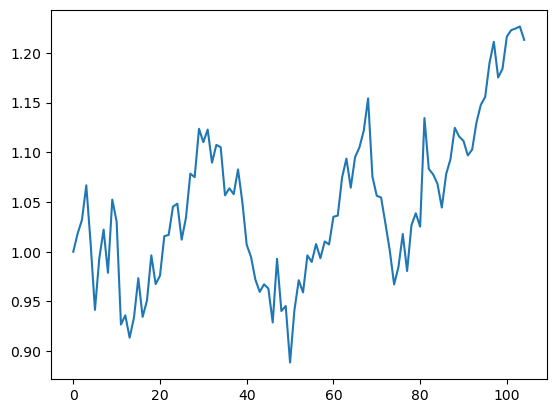

In [4]:
# estraiamo i dati della colonna GOOG relative all'andamento delle azioni di Google, e visualizziamolo mediante pyplot
stocks ['GOOG']
plt.plot(stocks['GOOG'])

In [5]:
#estraiamo le prime 5 righe della colonna GOOG e della colonna date,
#ed usiamoli come ascisse e ordinate su un grafico mediante pyplot.
y = stocks.loc[:5, 'GOOG']
x = stocks.loc[:5, 'date']

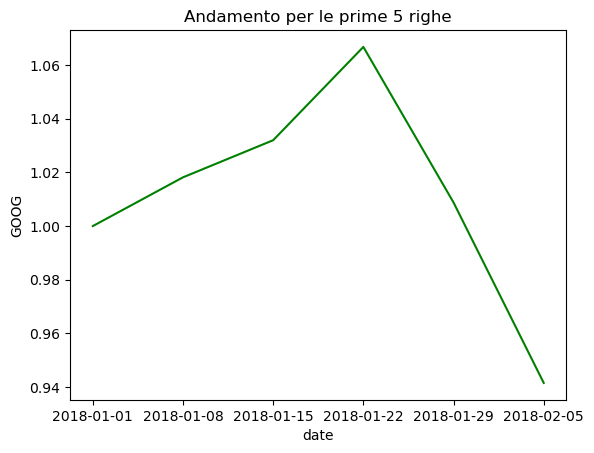

In [6]:
plt.plot (x,y, color = 'g')
plt.xlabel('date')
plt.ylabel('GOOG')
plt.title('Andamento per le prime 5 righe');

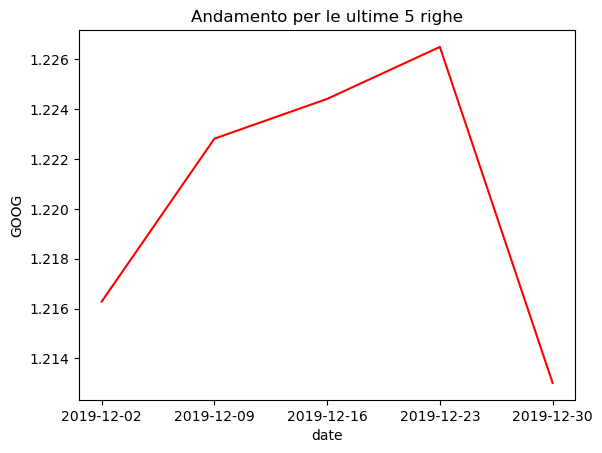

In [7]:
x = stocks.tail(5)['date']
y = stocks.tail(5)['GOOG']
plt.plot (x,y, color = 'r')
plt.xlabel('date')
plt.ylabel('GOOG')
plt.title('Andamento per le ultime 5 righe');

In [8]:
# estraimo le prime 20 istanze della colonna AAPL delle azioni di Apple, e visualizziamo il grafico tramite pyplot, in modo che:
# il grafico sia rosso
# la linea sia tratteggiata
# vi sia un pallino come marker
# l'asse delle ascisse si chiami "Data"
# l'asse dell ordinate si chiami "Valore"
# il titolo del grafico sia "Azioni Apple"
# il markerfacecolor sia nero
# la linea abbia spessore uguale a 2

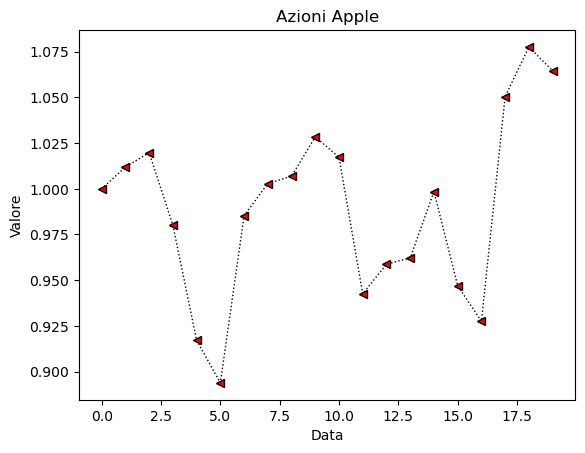

In [16]:
azioni_apple=stocks.loc[:19, "AAPL"]
plt.plot(azioni_apple, '<:k', markerfacecolor='r', linewidth=1.0)
plt.xlabel("Data")
plt.ylabel("Valore")
plt.title("Azioni Apple");

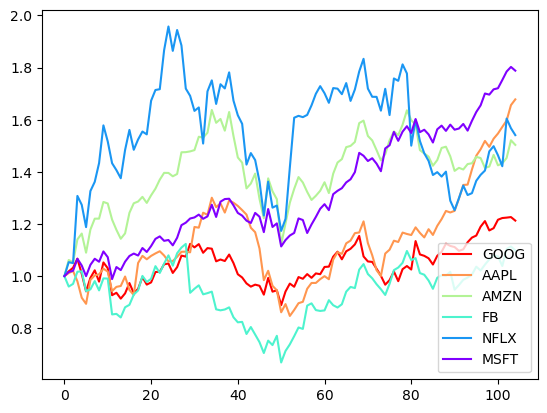

In [18]:
# Utilizzando i metodi di rappresentazione grafica dei Dataframe, visualizziamo l'andamento di tutte le azioni sullo stesso grafico.
import pandas as pd
df=pd.DataFrame(stocks)
df.plot(colormap = 'rainbow_r')
plt.legend(loc=4)

In [19]:
# ESERCIZIO 2
# Da plotly.express importiamo il dataset elections, mediante: 
# from plotly import express as px
# election = px.data.election()
# Disegnamo un grafico a barre dove confrontiamo i voti totali presi dai tre candidati
# Visualizzare un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti
# Visualizzarlo sia in formato appaiato che impilato (stacked)
# Salvare entrambi i grafici su disco in alta risoluzione

In [21]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
election = px.data.election()

In [22]:
election.head()

district  Coderre  Bergeron  Joly  total    winner     result  \
0     101-Bois-de-Liesse     2481      1829  3024   7334      Joly  plurality   
1  102-Cap-Saint-Jacques     2525      1163  2675   6363      Joly  plurality   
2   11-Sault-au-Récollet     3348      2770  2532   8650   Coderre  plurality   
3           111-Mile-End     1734      4782  2514   9030  Bergeron   majority   
4         112-DeLorimier     1770      5933  3044  10747  Bergeron   majority   

   district_id  
0          101  
1          102  
2           11  
3          111  
4          112

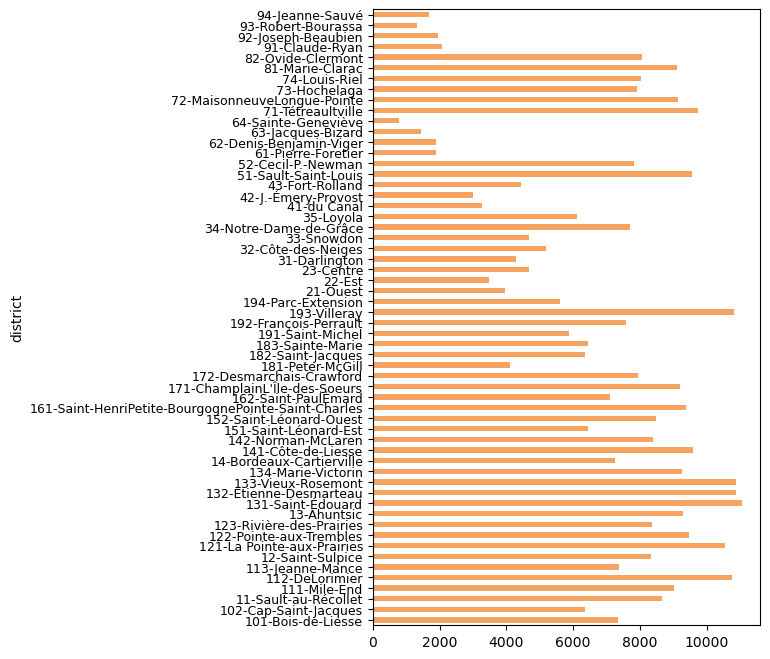

In [23]:
# disegnamo un grafico a barre dove confrontiamo i voti totali presi dai tre candidati
election = px.data.election()
election.set_index("district",inplace=True)
plt.figure(figsize=[5,8])
fig = election.total.plot( kind = 'barh', color = 'SandyBrown')
plt.yticks(fontsize=9);

In [24]:
#visualizziamo un grafico a barre comparativo dove si confrontano i voti presi nei primi 4 distretti
election.sort_values("total",inplace=True)
distretti=election.iloc[:4, :3]
distretti.plot(kind="barh",colormap = 'rainbow_r' )
plt.tight_layout()
plt.savefig("grafico_a_barre.png", dpi=600);

In [25]:
#visualizzarlo sia in formato impilato(stacked)
election.sort_values("total",inplace=True)
distretti=election.iloc[:4, :3]
distretti.plot(kind="barh",colormap = 'rainbow_r', stacked = True)
plt.tight_layout()
plt.savefig("grafico_a_barre_impilato.png", dpi=600);

In [26]:
# ESERCIZIO 3
# Da seaborn importiamo il dataset titanic, mediante:
# import seaborn as sns
# titanic=sns.load_dataset('titanic')
# Quanti ponti c'erano sulla nave?
# Ci sono dati mancanti? Dove? Quanti? Come potremmo gestirli?
# Tramite seaborn visualizziamo un jointpoint sulle colonne fare e age; che cosa stiamo guardando?

In [27]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [28]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [29]:
# Quanti ponti c'erano sulla nave?
len(titanic.deck.value_counts())

7

In [30]:
#Ci sono dati mancanti? Dove? Quanti? Come potremmo gestirli?
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [31]:
#possiamo optare di inserire i valori dell'età in base alla media della tariffa pagata.
titanic.groupby("age").fare.mean()

age
0.42       8.5167
0.67      14.5000
0.75      19.2583
0.83      23.8750
0.92     151.5500
           ...   
70.00     40.7500
70.50      7.7500
71.00     42.0792
74.00      7.7750
80.00     30.0000
Name: fare, Length: 88, dtype: float64

In [32]:
#tramite seaborn visualizziamo un jointplot sulle colonne fare e age; che cosa stiamo guardando?
sns.jointplot(data=titanic, x='fare', y='age', color = 'Aqua')

In [33]:
#Possiamo notare che la maggior parte dei passeggeri sono saliti pagando le tariffe più basse, 
#pochi i casi in cui i passeggeri sono saliti pagando tariffe più costose.
#Non vi è quindi una particolare relazione tra età e tariffe, dato che troviamo passegeri in classi costose già dalla prima fascia di età.

In [34]:
# SECONDA PARTE ESERCIZIO 3
# Visualizzare un grafico con la differenza tra il numero di passeggeri di ogni classe di imbarco
# Fare la stessa cosa per le colonne alive
# Qual' era la distribuzione delle tariffe (fare)?
# Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con uno swarmplot
# Visualizziamo un kdeplot per la colonna age
# Visualizziamo un boxplot e un lmplot rispetto alle colonne fare e survived che cose ne deduciamo?

In [35]:
# Visualizzare un grafico con la differenza tra il numero di passeggeri di ogni classe di imbarco
sns.countplot(data = titanic, x = 'class', palette = 'Set3') 

<Axes: xlabel='class', ylabel='count'>

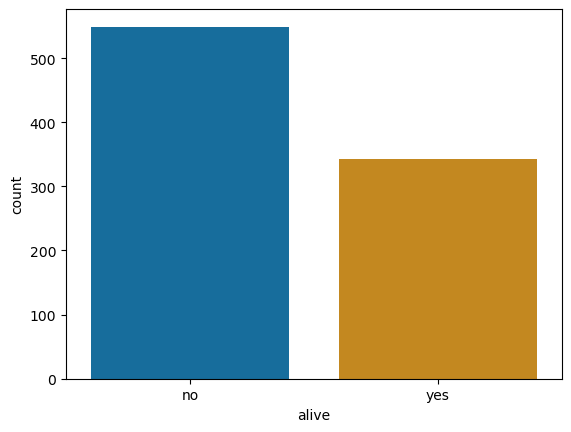

In [36]:
#stessa cosa con la colonna alive
sns.countplot(data=titanic, x='alive', palette = 'colorblind');

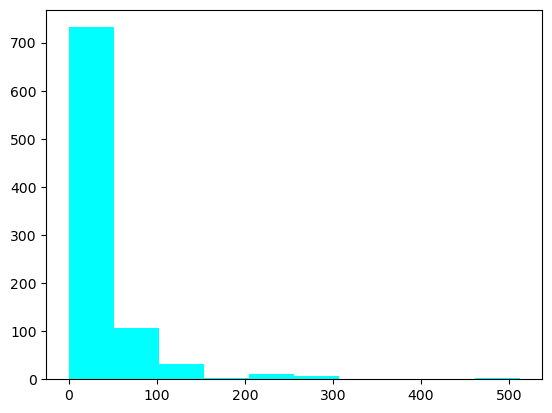

In [37]:
#Qual' era la distribuzione delle tariffe (fare)?
plt.hist(titanic['fare'],color = 'Aqua');

C:\Users\39347\Anaconda\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


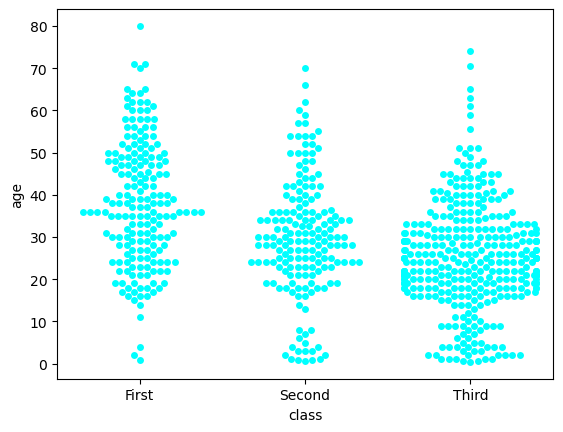

In [38]:
#Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco? Proviamo con un boxplot e con uno swarmplot
sns.swarmplot(data=titanic, x='class', y='age',color = 'Aqua');

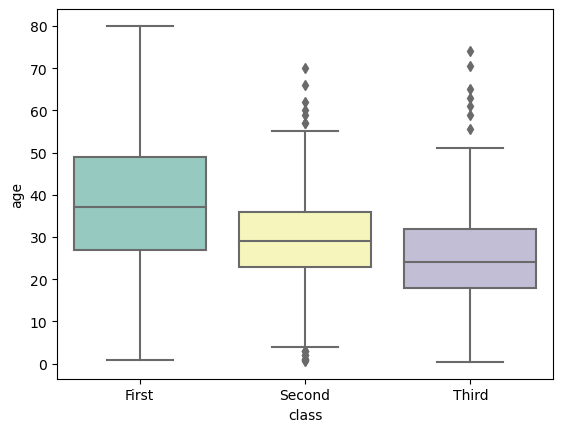

In [39]:
#boxplot
sns.boxplot(data=titanic, x='class', y='age',palette = 'Set3');

In [40]:
#visualizziamo un kdeplot per la colonna age
sns.kdeplot(data=titanic['age'], color = 'aqua');

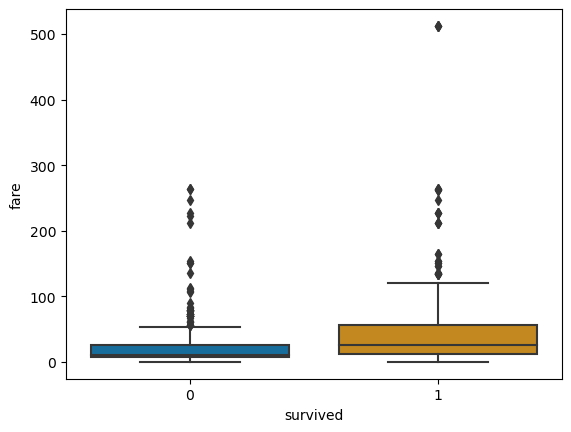

In [41]:
#Visualizziamo un boxplot e un lmplot rispetto alle colonne fare e survived che cose ne deduciamo?
sns.boxplot(data=titanic, x="survived", y="fare", palette = 'colorblind');

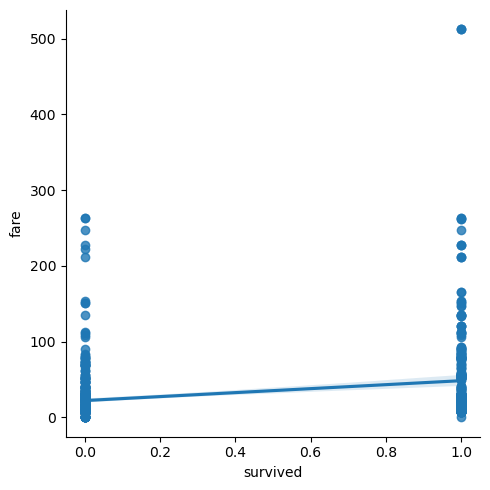

In [42]:
#lmplot
sns.lmplot(data=titanic, x="survived", y="fare");

In [43]:
#Si deduce che la maggior parte dei sopravvissuti sono coloro che hanno pagato una tariffa più alta.

In [44]:
# TERZA PARTE ESERCIZIO 3
# Realizziamo un grafico scatter interattivo tramite plotly.express dove avremo:
# l'età sull'asse x e il ponte sull'asse y
# il colore rispetto a se la persona è sopravvissuta o meno
# la dimensione del marker rispetto alla tariffa
# il simbolo (tramite il parametro symbol=) rispetto alla colonna sex.
# riordiniamo l'asse y in modo che rispetti la disposizione dei ponti, mediante il parametro category_orders={"deck": list("ABCDEFG")}
# Che conclusioni possiamo trarne?

In [45]:
px.scatter(data_frame=titanic, x="age", y="deck", color="survived", size="fare", symbol="sex", category_orders={"deck": list("ABCDEFG")}
          ,color_continuous_scale=px.colors.sequential.Viridis)

In [ ]:
# Possiamo dire che la maggior parte dei deceduti erano situati sul ponte C, mentre sul ponte B, 
# avendo pagato una tariffa ampiamente maggiore,come evidenzia la dimensione del marker, sono sopravvissuti più passeggeri.